### 주가 데이터 다운로드 후 파일로 저장

In [5]:
pip install yfinance


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\82106\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [6]:
# S&P 500 상위 100개 주식의 티커 리스트 (예시로 사용)
tickers = [
    'AAPL', 'MSFT', 'AMZN', 'FB', 'GOOGL', 'GOOG', 'BRK-B', 'JNJ', 'JPM', 'V', 
    'PG', 'T', 'MA', 'DIS', 'XOM', 'BAC', 'VZ', 'INTC', 'WMT', 'MRK', 
    'PFE', 'CSCO', 'HD', 'KO', 'CVX', 'PEP', 'CMCSA', 'ORCL', 'ABBV', 'PM',
    'LLY', 'ABT', 'UNH', 'ACN', 'NFLX', 'MCD', 'MDT', 'NKE', 'IBM', 'TMO',
    'BA', 'MMM', 'AMGN', 'TXN', 'HON', 'SBUX', 'NEE', 'BMY', 'LIN', 'LOW',
    'C', 'CHTR', 'GILD', 'DHR', 'FIS', 'AMD', 'QCOM', 'BLK', 'UNP', 'INTU',
    'UPS', 'COST', 'CVS', 'LMT', 'GS', 'TGT', 'ISRG', 'NOW', 'AMT', 'DE',
    'MS', 'CAT', 'BKNG', 'ADBE', 'SPGI', 'SCHW', 'GE', 'CI', 'SYK', 'MO',
    'MDLZ', 'AXP', 'USB', 'TJX', 'D', 'MU', 'ZTS', 'RTX', 'PNC', 'NSC',
    'ANTM', 'GM', 'CB', 'CME', 'CL', 'PLD', 'LRCX', 'SO', 'BDX', 'ADI'
]

In [7]:
import yfinance as yf
import pandas as pd

# 날짜 범위 설정
start_date = '2020-01-01'
end_date = '2020-12-31'

# 데이터 프레임을 생성하고 각 주식의 데이터를 다운로드
data = pd.DataFrame()
for ticker in tickers:
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    data[ticker] = stock_data['Adj Close']

# 데이터 확인
print(data.head())

# 데이터를 CSV 파일로 저장
data.to_csv('stock_data.csv')


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['FB']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********

                 AAPL        MSFT       AMZN  FB      GOOGL       GOOG  \
Date                                                                     
2020-01-02  72.960457  154.493835  94.900497 NaN  68.433998  68.368500   
2020-01-03  72.251129  152.570084  93.748497 NaN  68.075996  68.032997   
2020-01-06  72.826859  152.964432  95.143997 NaN  69.890503  69.710503   
2020-01-07  72.484344  151.569794  95.343002 NaN  69.755501  69.667000   
2020-01-08  73.650345  153.984055  94.598503 NaN  70.251999  70.216003   

                 BRK-B         JNJ         JPM           V  ...  ANTM  \
Date                                                        ...         
2020-01-02  228.389999  130.099121  123.533607  185.551468  ...   NaN   
2020-01-03  226.179993  128.592880  121.903435  184.075775  ...   NaN   
2020-01-06  226.990005  128.432449  121.806488  183.677750  ...   NaN   
2020-01-07  225.919998  129.216751  119.735703  183.192322  ...   NaN   
2020-01-08  225.990005  129.198914  120.669

### per 다운로드후 파일로 저장

In [8]:
financial_info = {}

for ticker in tickers:
    stock = yf.Ticker(ticker)
    try:
        info = stock.info
        financial_info[ticker] = {
            'PER': info.get('trailingPE', None),  # None을 기본값으로 사용하여 값이 없는 경우 None을 반환
        }
    except ValueError:  # 정보를 가져오는 중 문제가 발생한 경우 예외 처리
        financial_info[ticker] = {
            'PER': None
        }
        print(f"Failed to fetch data for {ticker}")

print(financial_info)

# 딕셔너리를 DataFrame으로 변환
df_financial_info = pd.DataFrame(list(financial_info.items()), columns=['Ticker', 'PER'])

# DataFrame 확인
print(df_financial_info)

# DataFrame을 CSV 파일로 저장
df_financial_info.to_csv('per_values.csv', index=False)


{'AAPL': {'PER': 28.970451}, 'MSFT': {'PER': 35.88205}, 'AMZN': {'PER': 52.407307}, 'FB': {'PER': None}, 'GOOGL': {'PER': 25.901989}, 'GOOG': {'PER': 26.211655}, 'BRK-B': {'PER': 12.126806}, 'JNJ': {'PER': 22.46954}, 'JPM': {'PER': 11.986128}, 'V': {'PER': 31.286674}, 'PG': {'PER': 27.102942}, 'T': {'PER': 9.27957}, 'MA': {'PER': 36.416866}, 'DIS': {'PER': 115.03261}, 'XOM': {'PER': 14.449756}, 'BAC': {'PER': 13.175861}, 'VZ': {'PER': 15.18352}, 'INTC': {'PER': 31.453608}, 'WMT': {'PER': 31.628273}, 'MRK': {'PER': 143.65555}, 'PFE': {'PER': None}, 'CSCO': {'PER': 14.796352}, 'HD': {'PER': 22.580132}, 'KO': {'PER': 25.534138}, 'CVX': {'PER': 15.122242}, 'PEP': {'PER': 27.285067}, 'CMCSA': {'PER': 10.530504}, 'ORCL': {'PER': 30.704487}, 'ABBV': {'PER': 48.0}, 'PM': {'PER': 19.392578}, 'LLY': {'PER': 112.0858}, 'ABT': {'PER': 32.638626}, 'UNH': {'PER': 31.27995}, 'ACN': {'PER': 27.870354}, 'NFLX': {'PER': 42.759365}, 'MCD': {'PER': 23.051826}, 'MDT': {'PER': 26.514284}, 'NKE': {'PER': 27.

### 베타값 다운로드후 저장

직접 계산

In [9]:
import yfinance as yf
import pandas as pd
import numpy as np

# 날짜 범위 설정
start_date = '2020-01-01'
end_date = '2020-12-31'

# S&P 500 지수 데이터 가져오기
market_index = yf.Ticker('^GSPC')
market_data = market_index.history(start=start_date, end=end_date)
market_data = market_data['Close'].resample('M').ffill().pct_change()

# 값을 저장할 딕셔너리 초기화
beta_values = {}

for ticker in tickers:
    stock = yf.Ticker(ticker)
    try:
        # 주식 데이터 가져오기
        stock_data = stock.history(start=start_date, end=end_date)
        stock_data = stock_data['Close'].resample('M').ffill().pct_change()
        
        # 주식과 시장 지수의 월간 수익률 계산
        combined_data = pd.concat([stock_data, market_data], axis=1).dropna()
        combined_data.columns = ['Stock', 'Market']
        
        # 베타 계산
        cov_matrix = np.cov(combined_data['Stock'], combined_data['Market'])
        beta = cov_matrix[0, 1] / cov_matrix[1, 1]
        
        beta_values[ticker] = beta
    except Exception as e:  # 정보를 가져오는 중 문제가 발생한 경우 예외 처리
        beta_values[ticker] = None
        print(f"Failed to fetch data for {ticker}: {e}")

# 딕셔너리를 DataFrame으로 변환
df_beta_values = pd.DataFrame(list(beta_values.items()), columns=['Ticker', 'Beta'])

# DataFrame 확인
print(df_beta_values)

C:\Users\82106\AppData\Local\Temp\ipykernel_23796\4199116028.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  market_data = market_data['Close'].resample('M').ffill().pct_change()
C:\Users\82106\AppData\Local\Temp\ipykernel_23796\4199116028.py:22: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  stock_data = stock_data['Close'].resample('M').ffill().pct_change()
C:\Users\82106\AppData\Local\Temp\ipykernel_23796\4199116028.py:22: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  stock_data = stock_data['Close'].resample('M').ffill().pct_change()
C:\Users\82106\AppData\Local\Temp\ipykernel_23796\4199116028.py:22: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  stock_data = stock_data['Close'].resample('M').ffill().pct_change()
FB: No timezone found, symbol may be delisted
C:\U

Failed to fetch data for FB: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'


C:\Users\82106\AppData\Local\Temp\ipykernel_23796\4199116028.py:22: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  stock_data = stock_data['Close'].resample('M').ffill().pct_change()
C:\Users\82106\AppData\Local\Temp\ipykernel_23796\4199116028.py:22: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  stock_data = stock_data['Close'].resample('M').ffill().pct_change()
C:\Users\82106\AppData\Local\Temp\ipykernel_23796\4199116028.py:22: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  stock_data = stock_data['Close'].resample('M').ffill().pct_change()
C:\Users\82106\AppData\Local\Temp\ipykernel_23796\4199116028.py:22: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  stock_data = stock_data['Close'].resample('M').ffill().pct_change()
C:\Users\82106\AppData\Local\Temp\ipykernel_23796\41

Failed to fetch data for ANTM: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'


C:\Users\82106\AppData\Local\Temp\ipykernel_23796\4199116028.py:22: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  stock_data = stock_data['Close'].resample('M').ffill().pct_change()
C:\Users\82106\AppData\Local\Temp\ipykernel_23796\4199116028.py:22: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  stock_data = stock_data['Close'].resample('M').ffill().pct_change()
C:\Users\82106\AppData\Local\Temp\ipykernel_23796\4199116028.py:22: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  stock_data = stock_data['Close'].resample('M').ffill().pct_change()
C:\Users\82106\AppData\Local\Temp\ipykernel_23796\4199116028.py:22: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  stock_data = stock_data['Close'].resample('M').ffill().pct_change()
C:\Users\82106\AppData\Local\Temp\ipykernel_23796\41

   Ticker      Beta
0    AAPL  1.281428
1    MSFT  0.681099
2    AMZN  0.859518
3      FB       NaN
4   GOOGL  0.990363
..    ...       ...
95    PLD  0.533923
96   LRCX  1.090379
97     SO  0.559367
98    BDX  0.528945
99    ADI  1.079024

[100 rows x 2 columns]


C:\Users\82106\AppData\Local\Temp\ipykernel_23796\4199116028.py:22: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  stock_data = stock_data['Close'].resample('M').ffill().pct_change()


yfinance 에서 베타값 가져오는 코드

In [10]:
# 베타값을 저장할 딕셔너리 초기화
beta_values = {}

for ticker in tickers:
    stock = yf.Ticker(ticker)
    try:
        info = stock.info
        beta_values[ticker] = info.get('beta', None)  # 베타값 수집
    except ValueError:  # 정보를 가져오는 중 문제가 발생한 경우 예외 처리
        beta_values[ticker] = None
        print(f"Failed to fetch data for {ticker}")

# 딕셔너리를 DataFrame으로 변환
df_beta_values = pd.DataFrame(list(beta_values.items()), columns=['Ticker', 'Beta'])

# DataFrame 확인
print(df_beta_values)

# DataFrame을 CSV 파일로 저장
df_beta_values.to_csv('df_beta_values.csv', index=False)

   Ticker   Beta
0    AAPL  1.264
1    MSFT  0.893
2    AMZN  1.155
3      FB    NaN
4   GOOGL  1.019
..    ...    ...
95    PLD  1.058
96   LRCX  1.511
97     SO  0.476
98    BDX  0.468
99    ADI  1.144

[100 rows x 2 columns]


In [11]:
df_beta_values

,Ticker,Beta
0,AAPL,1.264
1,MSFT,0.893
2,AMZN,1.155
3,FB,NaN
4,GOOGL,1.019
...,...,...
95,PLD,1.058
96,LRCX,1.511
97,SO,0.476
98,BDX,0.468


In [12]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 결측치가 있는 행 제거
df_beta_values.dropna(subset=['Beta'], inplace=True)

# 클러스터링을 위해 'Beta' 열만 선택
X = df_beta_values[['Beta']]

# KMeans 모델 생성 및 학습
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)

# 클러스터 레이블 추가
df_beta_values['Cluster'] = kmeans.labels_

# 결과 출력
print(df_beta_values)

   Ticker   Beta  Cluster
0    AAPL  1.264        3
1    MSFT  0.893        0
2    AMZN  1.155        3
4   GOOGL  1.019        0
5    GOOG  1.019        0
..    ...    ...      ...
95    PLD  1.058        0
96   LRCX  1.511        2
97     SO  0.476        1
98    BDX  0.468        1
99    ADI  1.144        3

[98 rows x 3 columns]


베타값이 클러스터링 테스트 하여 분산이 잘 되는지 확인

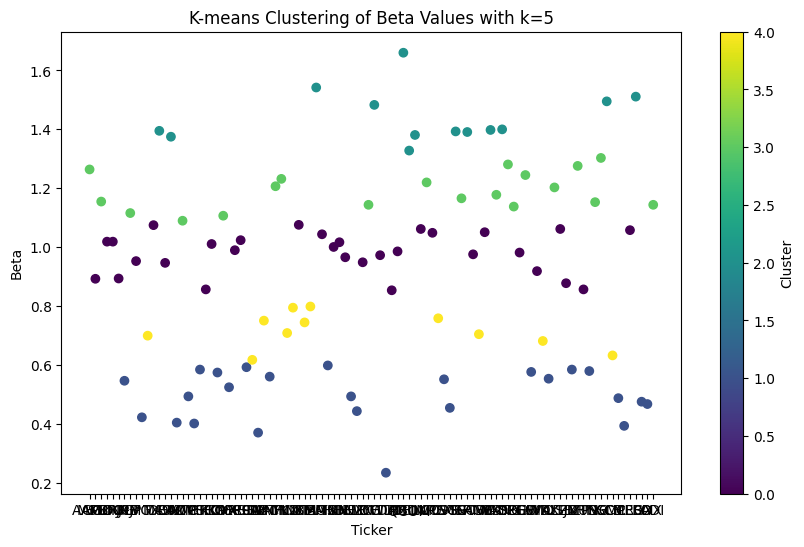

In [13]:
# 클러스터링 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(df_beta_values['Ticker'], df_beta_values['Beta'], c=df_beta_values['Cluster'], cmap='viridis')
plt.xlabel('Ticker')
plt.ylabel('Beta')
plt.title('K-means Clustering of Beta Values with k=5')
plt.colorbar(label='Cluster')
plt.show()

적절하게 클러스터가 형성되는것을 볼수있다

### 배당 수익률 다운로드

In [14]:
# 배당수익률을 저장할 딕셔너리 초기화
dividend_yields = {}

for ticker in tickers:
    stock = yf.Ticker(ticker)
    try:
        info = stock.info
        # 배당수익률 수집, 배당수익률이 없는 경우 None으로 처리
        dividend_yields[ticker] = info.get('dividendYield', None) * 100 if info.get('dividendYield') is not None else None
    except ValueError:  # 정보를 가져오는 중 문제가 발생한 경우 예외 처리
        dividend_yields[ticker] = None
        print(f"Failed to fetch data for {ticker}")

# 딕셔너리를 DataFrame으로 변환
df_dividend_yields = pd.DataFrame(list(dividend_yields.items()), columns=['Ticker', 'DividendYield'])

# DataFrame 확인
print(df_dividend_yields)

   Ticker  DividendYield
0    AAPL           0.55
1    MSFT           0.72
2    AMZN            NaN
3      FB            NaN
4   GOOGL           0.47
..    ...            ...
95    PLD           3.57
96   LRCX           0.87
97     SO           3.69
98    BDX           1.61
99    ADI           1.78

[100 rows x 2 columns]


In [15]:
# DataFrame을 CSV 파일로 저장
df_dividend_yields.to_csv('dividend_yields.csv', index=False)

### 거래량 다운로드

In [16]:
# 각 티커에 대해 데이터 다운로드
data = yf.download(tickers, start="2023-01-01", end="2023-04-01")

# 거래량만 추출
volume_data = data['Volume']

volume_data.head()

[*********************100%%**********************]  100 of 100 completed

2 Failed downloads:
['FB', 'ANTM']: Exception('%ticker%: No timezone found, symbol may be delisted')


Ticker,AAPL,ABBV,ABT,ACN,ADBE,ADI,AMD,AMGN,AMT,AMZN,...,TXN,UNH,UNP,UPS,USB,V,VZ,WMT,XOM,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-03,112117500,4937500,4171900,2250100,2229100,4475700,46851800,2594800,1812400,76706000,...,4294100,3525600,1766300,2206500,12795900,4202800,31330700,17249700,15146200,1840600
2023-01-04,89113600,4440400,4395500,2052400,2186800,3477900,47477100,1773800,1796000,68885100,...,6285300,5070400,1830900,1965100,16338400,6606200,28779500,13338300,18058400,1796100
2023-01-05,80962700,3516000,4896900,2477100,2081600,4750300,46159500,2056000,1495000,67930800,...,6876800,5497100,2317500,2736800,8364000,5246000,29987200,13274400,15946600,1560900
2023-01-06,87754700,5099100,3800400,1587000,2216600,3483400,70161300,2887800,1980200,83303400,...,6725900,4841300,3375200,3690100,8198300,6829700,26010400,21231900,16348100,1761200
2023-01-09,70790800,7833000,7277700,2181500,3133800,3734100,69741300,2160700,1727200,65266100,...,5733900,3702800,2259500,3214600,13170700,6294500,23062200,17756700,17964600,1700500


거래량 평균 계산

In [17]:
# 각 티커의 평균 거래량 계산
average_volumes = volume_data.mean()

print(average_volumes)

Ticker
AAPL    6.888900e+07
ABBV    6.343245e+06
ABT     5.172203e+06
ACN     2.416384e+06
ADBE    3.051076e+06
            ...     
V       6.287800e+06
VZ      2.044373e+07
WMT     1.963317e+07
XOM     1.699392e+07
ZTS     2.172282e+06
Length: 100, dtype: float64


In [18]:
# 평균 거래량 데이터를 'volume'이라는 열 이름으로 데이터 프레임 생성
average_volume_df = pd.DataFrame(average_volumes, columns=['volume'])

print(average_volume_df)

              volume
Ticker              
AAPL    6.888900e+07
ABBV    6.343245e+06
ABT     5.172203e+06
ACN     2.416384e+06
ADBE    3.051076e+06
...              ...
V       6.287800e+06
VZ      2.044373e+07
WMT     1.963317e+07
XOM     1.699392e+07
ZTS     2.172282e+06

[100 rows x 1 columns]


거래량 데이터에서 결측치 제거하기

In [19]:
average_volumes.isnull().sum()


2

In [20]:
# 결측치가 있는 행 제거
average_volumes_cleaned = average_volumes.dropna()

average_volumes_cleaned.isnull().sum()

0

In [21]:
# 인덱스를 해제하고 열 이름 변경
average_volumes = average_volumes_cleaned.reset_index().rename(columns={'index': 'Ticker', 'volume': 'Volume'})

# 결과 출력
print(average_volumes)

   Ticker             0
0    AAPL  6.888900e+07
1    ABBV  6.343245e+06
2     ABT  5.172203e+06
3     ACN  2.416384e+06
4    ADBE  3.051076e+06
..    ...           ...
93      V  6.287800e+06
94     VZ  2.044373e+07
95    WMT  1.963317e+07
96    XOM  1.699392e+07
97    ZTS  2.172282e+06

[98 rows x 2 columns]


In [22]:
# DataFrame을 CSV 파일로 저장
average_volumes.to_csv('average_volumes.csv', index=False)

### 변동성 다운로드

In [23]:
# 각 티커에 대해 데이터 다운로드
data = yf.download(tickers, start="2023-01-01", end="2023-04-01")

# 일별 수익률 계산
daily_returns = data['Adj Close'].pct_change()

# 변동성 계산 (일별 수익률의 표준편차)
volatility = daily_returns.std()

# 결과를 DataFrame에 추가
new_row = pd.DataFrame({'Ticker': [ticker], 'Volatility': [volatility]})
volatility_df = pd.concat([volatility_df, new_row], ignore_index=True)

[*********************100%%**********************]  100 of 100 completed

2 Failed downloads:
['FB', 'ANTM']: Exception('%ticker%: No timezone found, symbol may be delisted')
C:\Users\82106\AppData\Local\Temp\ipykernel_23796\591742349.py:5: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  daily_returns = data['Adj Close'].pct_change()


In [24]:
import yfinance as yf
import pandas as pd

# 데이터를 다운로드할 기간 설정
start_date = '2023-01-01'
end_date = '2023-12-31'

# 종목별로 데이터 다운로드 및 변동성 계산을 위한 빈 DataFrame 생성
volatility_df = pd.DataFrame()

# 각 종목에 대해 데이터 다운로드 및 변동성 계산
for ticker in tickers:
    # 데이터 다운로드
    data = yf.download(ticker, start=start_date, end=end_date)
    
    # 일별 수익률 계산
    daily_returns = data['Adj Close'].pct_change()
    
    # 변동성 계산 (일별 수익률의 표준편차)
    volatility = daily_returns.std()
    
    # 결과를 DataFrame에 추가
    new_row = pd.DataFrame({'Ticker': [ticker], 'Volatility': [volatility]})
    volatility_df = pd.concat([volatility_df, new_row], ignore_index=True)

# DataFrame 출력
print(volatility_df)



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['FB']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********

   Ticker  Volatility
0    AAPL    0.012570
1    MSFT    0.015824
2    AMZN    0.020805
3      FB         NaN
4   GOOGL    0.019149
..    ...         ...
95    PLD    0.016672
96   LRCX    0.022521
97     SO    0.011885
98    BDX    0.012176
99    ADI    0.016489

[100 rows x 2 columns]


In [25]:
# DataFrame을 CSV 파일로 저장
volatility_df.to_csv('volatility_df.csv', index=False)

### RSI 지수 다운로드

In [26]:
import yfinance as yf
import pandas as pd

def calculate_rsi(data, window=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window, min_periods=1).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window, min_periods=1).mean()

    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# 데이터 다운로드 기간 설정
start_date = '2023-01-01'
end_date = '2023-12-31'

# 결과 저장을 위한 DataFrame 생성
rsi_summary_df = pd.DataFrame()

for ticker in tickers:
    # yfinance를 통해 주식 데이터 다운로드
    data = yf.download(ticker, start=start_date, end=end_date)

    # RSI 계산
    rsi = calculate_rsi(data['Adj Close'])

    # 최근 50일의 RSI 평균 계산
    rsi_mean = rsi.tail(50).mean()

    # 결과를 새로운 DataFrame에 추가
    new_row = pd.DataFrame({'Ticker': [ticker], 'RSI': [rsi_mean]})
    rsi_summary_df = pd.concat([rsi_summary_df, new_row], ignore_index=True)

# 결과 출력
print(rsi_summary_df)




[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['FB']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********

   Ticker        RSI
0    AAPL  60.891036
1    MSFT  61.321318
2    AMZN  61.228543
3      FB        NaN
4   GOOGL  53.160397
..    ...        ...
95    PLD  63.595179
96   LRCX  62.697293
97     SO  59.866619
98    BDX  44.862782
99    ADI  60.514308

[100 rows x 2 columns]


In [27]:
# DataFrame을 CSV 파일로 저장
rsi_summary_df.to_csv('average_rsi_df.csv', index=False)

### 데이터 6개 csv 파일 병합

In [28]:
import pandas as pd

# 각 파일을 로드
average_rsi_df = pd.read_csv('C:/Users/82106/Desktop/경영 캡스톤 프로젝트2/average_rsi_df.csv')
average_volumes = pd.read_csv('C:/Users/82106/Desktop/경영 캡스톤 프로젝트2/average_volumes.csv')
df_beta_values = pd.read_csv('C:/Users/82106/Desktop/경영 캡스톤 프로젝트2/df_beta_values.csv')
dividend_yields = pd.read_csv('C:/Users/82106/Desktop/경영 캡스톤 프로젝트2/dividend_yields.csv')
per_values = pd.read_csv('C:/Users/82106/Desktop/경영 캡스톤 프로젝트2/per_values.csv')
volatility_df = pd.read_csv('C:/Users/82106/Desktop/경영 캡스톤 프로젝트2/volatility_df.csv')

# 모든 데이터를 'Ticker' 기준으로 병합
data_frames = [average_rsi_df, average_volumes, df_beta_values, dividend_yields, per_values, volatility_df]
merged_df = pd.concat(data_frames, axis=1)
merged_df = merged_df.loc[:,~merged_df.columns.duplicated()]  # 중복 열 제거

# 병합된 데이터 프레임 출력
merged_df.head()


,Ticker,RSI,0,Beta,DividendYield,PER,Volatility
0,AAPL,60.891036,6.888900e+07,1.264,0.55,{'PER': 28.970451},0.012570
1,MSFT,61.321318,6.343245e+06,0.893,0.72,{'PER': 35.88205},0.015824
2,AMZN,61.228543,5.172203e+06,1.155,NaN,{'PER': 52.407307},0.020805
3,FB,NaN,2.416384e+06,NaN,NaN,{'PER': None},NaN
4,GOOGL,53.160397,3.051076e+06,1.019,0.47,{'PER': 25.901989},0.019149


### 배당수익률이 NaN인 행은 0으로 대체

In [29]:
# 'DividendYield' 열의 결측치를 0으로 대체
merged_df['DividendYield'] = merged_df['DividendYield'].fillna(0)

In [30]:
merged_df.rename(columns={'0': 'volume'}, inplace=True)


### 6개열에서 결측치가 한개라도 있는 행은 삭제

In [31]:
# 결측치가 있는 행 삭제
cleaned_df = merged_df.dropna(subset=['PER', 'DividendYield', 'Beta','RSI','volume','Volatility'])

# 결과 확인
print(cleaned_df)

   Ticker        RSI        volume   Beta  DividendYield                 PER  \
0    AAPL  60.891036  6.888900e+07  1.264           0.55  {'PER': 28.970451}   
1    MSFT  61.321318  6.343245e+06  0.893           0.72   {'PER': 35.88205}   
2    AMZN  61.228543  5.172203e+06  1.155           0.00  {'PER': 52.407307}   
4   GOOGL  53.160397  3.051076e+06  1.019           0.47  {'PER': 25.901989}   
5    GOOG  53.086364  3.502121e+06  1.019           0.47  {'PER': 26.211655}   
..    ...        ...           ...    ...            ...                 ...   
93    CME  51.810189  6.287800e+06  0.488           4.15  {'PER': 23.908884}   
94     CL  64.148240  2.044373e+07  0.394           2.10    {'PER': 29.9873}   
95    PLD  63.595179  1.963317e+07  1.058           3.57   {'PER': 31.48538}   
96   LRCX  62.697293  1.699392e+07  1.511           0.87   {'PER': 33.23979}   
97     SO  59.866619  2.172282e+06  0.476           3.69  {'PER': 20.388601}   

    Volatility  
0     0.012570  
1    

13개 행이 삭제됨

### 범주형 변수 인코딩

In [32]:
# 데이터 유형 확인
print("Data types before conversion:")
print(cleaned_df[['PER', 'DividendYield', 'Beta','RSI','volume','Volatility']].dtypes)

Data types before conversion:
PER               object
DividendYield    float64
Beta             float64
RSI              float64
volume           float64
Volatility       float64
dtype: object


PER의 { } 안의 수만 추출 하도록 가공

In [33]:
import ast
import pandas as pd

def extract_per_value(per_string):
    if pd.isna(per_string):
        return float('nan')  # 입력 값이 NaN인 경우, NaN 반환

    try:
        # 문자열을 사전으로 변환
        per_dict = ast.literal_eval(per_string)
        # 'PER' 키의 값을 float으로 변환하여 반환
        return float(per_dict['PER']) if per_dict['PER'] is not None else float('nan')
    except (ValueError, SyntaxError, KeyError, TypeError):
        # 변환에 실패한 경우 NaN 반환
        return float('nan')

# 'PER' 열을 숫자형으로 변환
cleaned_df['PER'] = cleaned_df['PER'].apply(extract_per_value)

# 결과 확인
print(cleaned_df[['Ticker', 'PER']])



   Ticker        PER
0    AAPL  28.970451
1    MSFT  35.882050
2    AMZN  52.407307
4   GOOGL  25.901989
5    GOOG  26.211655
..    ...        ...
93    CME  23.908884
94     CL  29.987300
95    PLD  31.485380
96   LRCX  33.239790
97     SO  20.388601

[96 rows x 2 columns]


C:\Users\82106\AppData\Local\Temp\ipykernel_23796\2065435116.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['PER'] = cleaned_df['PER'].apply(extract_per_value)


In [34]:
cleaned_df

,Ticker,RSI,volume,Beta,DividendYield,PER,Volatility
0,AAPL,60.891036,6.888900e+07,1.264,0.55,28.970451,0.012570
1,MSFT,61.321318,6.343245e+06,0.893,0.72,35.882050,0.015824
2,AMZN,61.228543,5.172203e+06,1.155,0.00,52.407307,0.020805
4,GOOGL,53.160397,3.051076e+06,1.019,0.47,25.901989,0.019149
5,GOOG,53.086364,3.502121e+06,1.019,0.47,26.211655,0.019283
...,...,...,...,...,...,...,...
93,CME,51.810189,6.287800e+06,0.488,4.15,23.908884,0.011325
94,CL,64.148240,2.044373e+07,0.394,2.10,29.987300,0.010355
95,PLD,63.595179,1.963317e+07,1.058,3.57,31.485380,0.016672
96,LRCX,62.697293,1.699392e+07,1.511,0.87,33.239790,0.022521


### 결측치 처리하기

In [35]:
# 'PER' 열에서 NaN 값을 가진 행을 식별
nan_per_tickers = cleaned_df[cleaned_df['PER'].isna()]['Ticker']

# 결과 출력
print("NaN 이 있는 티커:")
print(nan_per_tickers)


NaN 이 있는 티커:
20    PFE
40     BA
41    MMM
47    BMY
85     MU
Name: Ticker, dtype: object


In [36]:
# 'PER' 열에서 NaN 값이 있는 행을 삭제
cleaned_df = cleaned_df.dropna(subset=['PER'])

In [37]:
# 'PER' 열에서 NaN 값을 가진 행을 식별
nan_per_tickers = cleaned_df[cleaned_df['PER'].isna()]['Ticker']

# 결과 출력
print("NaN 이 있는 티커:")
print(nan_per_tickers)

NaN 이 있는 티커:
Series([], Name: Ticker, dtype: object)


### 변수 6개로 계층적 클러스터링 

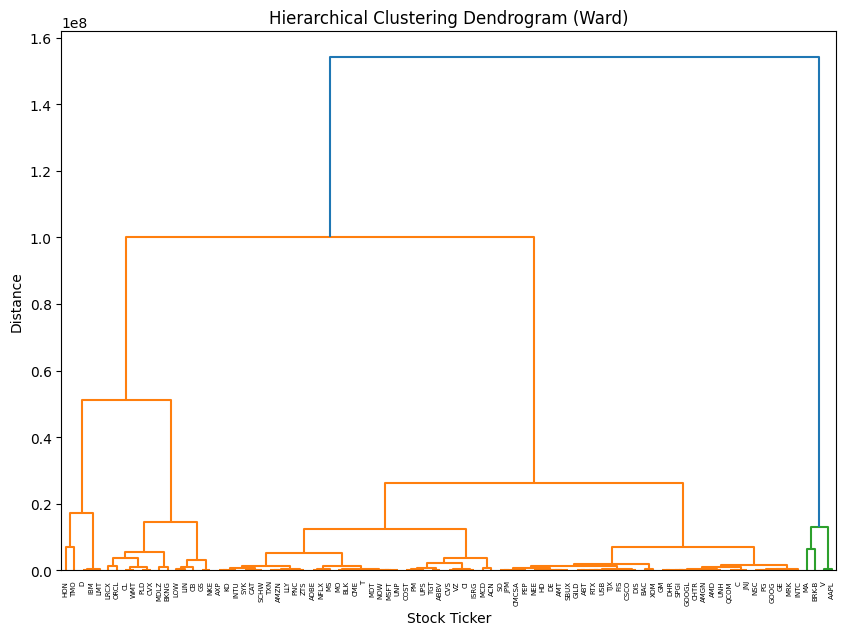

In [38]:
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# 클러스터링을 위해 필요한 열 선택
data_for_clustering = cleaned_df[['PER', 'DividendYield', 'Beta','RSI','volume','Volatility']]

# 계층적 클러스터링 수행 (와드 연결 기법 사용)
linked = linkage(data_for_clustering, method='ward')

# 덴드로그램으로 결과 시각화
plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           labels=cleaned_df['Ticker'].values,
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram (Ward)')
plt.xlabel('Stock Ticker')
plt.ylabel('Distance')
plt.show()


### 최적의 클러스터수를 정하기 위한 실루엣 스코어 시각화

In [39]:
data_for_clustering

,PER,DividendYield,Beta,RSI,volume,Volatility
0,28.970451,0.55,1.264,60.891036,6.888900e+07,0.012570
1,35.882050,0.72,0.893,61.321318,6.343245e+06,0.015824
2,52.407307,0.00,1.155,61.228543,5.172203e+06,0.020805
4,25.901989,0.47,1.019,53.160397,3.051076e+06,0.019149
5,26.211655,0.47,1.019,53.086364,3.502121e+06,0.019283
...,...,...,...,...,...,...
93,23.908884,4.15,0.488,51.810189,6.287800e+06,0.011325
94,29.987300,2.10,0.394,64.148240,2.044373e+07,0.010355
95,31.485380,3.57,1.058,63.595179,1.963317e+07,0.016672
96,33.239790,0.87,1.511,62.697293,1.699392e+07,0.022521


In [40]:
print("Data for clustering shape:", data_for_clustering.shape)
print("Labels shape:", cleaned_df['Ticker'].shape)

Data for clustering shape: (91, 6)
Labels shape: (91,)


### 계층적 클러스터링 와드기법 재수행

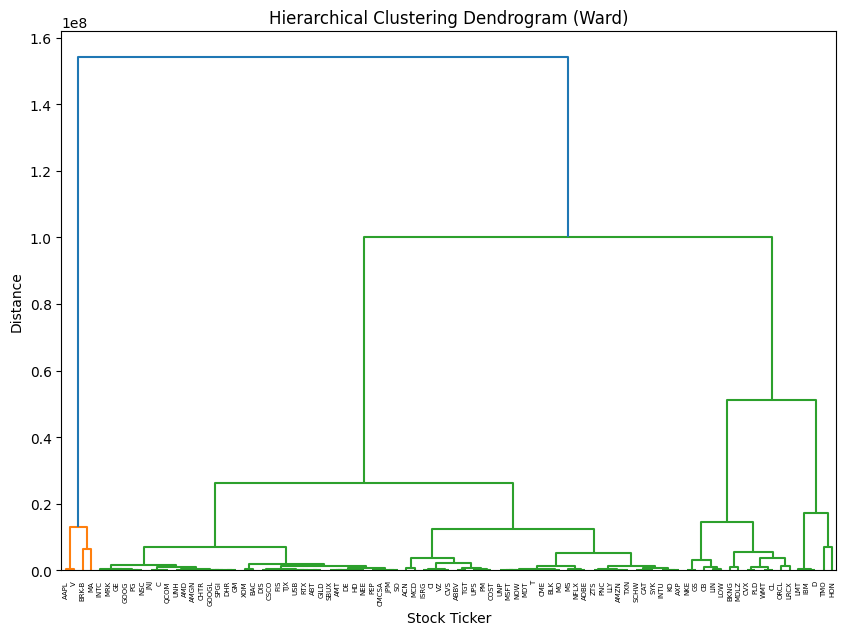

In [41]:
# 데이터 준비 및 결측치 제거
cleaned_df = cleaned_df.dropna(subset=['PER', 'DividendYield', 'Beta','RSI','volume','Volatility'])
data_for_clustering = cleaned_df[['PER', 'DividendYield', 'Beta','RSI','volume','Volatility']]

# 계층적 클러스터링 수행
linked = linkage(data_for_clustering, method='ward')

# 덴드로그램 생성
plt.figure(figsize=(10, 7))
dendrogram(linked, labels=cleaned_df['Ticker'].values, orientation='top')
plt.title('Hierarchical Clustering Dendrogram (Ward)')
plt.xlabel('Stock Ticker')
plt.ylabel('Distance')
plt.show()

### 최적의 클러스터수를 찾기위한 실루엣 점수 시각화

Number of clusters: 2, Silhouette Score: 0.8176870255743246
Number of clusters: 3, Silhouette Score: 0.7276148813784945
Number of clusters: 4, Silhouette Score: 0.7278053535031441
Number of clusters: 5, Silhouette Score: 0.6113949066162614
Number of clusters: 6, Silhouette Score: 0.6104560780375955
Number of clusters: 7, Silhouette Score: 0.6025727373212157
Number of clusters: 8, Silhouette Score: 0.6010178583067188
Number of clusters: 9, Silhouette Score: 0.6158090280081406
Number of clusters: 10, Silhouette Score: 0.6084271930766523
Number of clusters: 11, Silhouette Score: 0.6001924499050482
Number of clusters: 12, Silhouette Score: 0.5968166691187116
Number of clusters: 13, Silhouette Score: 0.5886774018712587
Number of clusters: 14, Silhouette Score: 0.6246450906057925
Number of clusters: 15, Silhouette Score: 0.6256519533426181
Number of clusters: 16, Silhouette Score: 0.6282408909289029
Number of clusters: 17, Silhouette Score: 0.6418370846723385
Number of clusters: 18, Silhouet

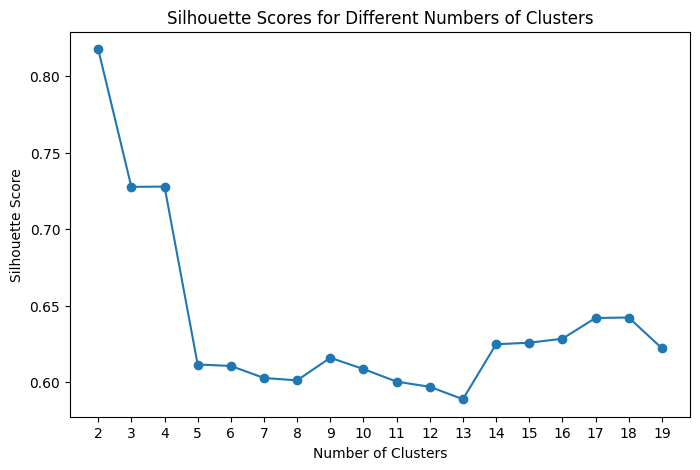

In [42]:
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import silhouette_score

# 클러스터 범위 설정 및 실루엣 점수 계산
cluster_range = range(2, 20)
silhouette_scores = []

for n_clusters in cluster_range:
    labels = fcluster(linked, n_clusters, criterion='maxclust')
    if len(labels) == len(data_for_clustering):
        score = silhouette_score(data_for_clustering, labels)
        silhouette_scores.append(score)
        print(f"Number of clusters: {n_clusters}, Silhouette Score: {score}")
    else:
        print(f"Mismatch in number of labels and samples for {n_clusters} clusters. Expected {len(data_for_clustering)} got {len(labels)}")

# 실루엣 점수 그래프 표시
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xticks(cluster_range)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.show()

클러스터수는 2이나 4또는 9,14,15,16,17,18일때가 점수가 높은축에 속하기 때문에 이중에 하나를 골라야한다.

적절히 클러스터링이 되고 점수가 높은 4로 선택한다. 

### 여러 클러스터 기법을 사용하여 분산이 잘된 클러스터 기법 탐색하기 

### 계층적 클러스터링 와드기법

In [43]:
from scipy.cluster.hierarchy import fcluster

# 클러스터링을 위해 필요한 열 선택
# 이전 단계에서 정의된 'data_for_clustering'와 'linked'를 사용
data_for_clustering = cleaned_df[['PER', 'DividendYield', 'Beta','RSI','volume','Volatility']]
linked = linkage(data_for_clustering, method='ward')

# 9개의 클러스터로 클러스터링 수행
cluster_labels = fcluster(linked, 4, criterion='maxclust')

# 클러스터 레이블을 데이터프레임에 추가
cleaned_df['Cluster_Labels'] = cluster_labels

# 클러스터 레이블별로 개수 확인
cluster_counts1 = cleaned_df['Cluster_Labels'].value_counts()

# 클러스터링 결과 및 개수 출력
print(cluster_counts1)


Cluster_Labels
2    69
3    13
4     5
1     4
Name: count, dtype: int64


### KMeans 클러스터링

In [44]:
from sklearn.cluster import KMeans

# 클러스터링을 위한 데이터 준비
# 이전에 정의된 'data_for_clustering'을 사용
data_for_clustering = cleaned_df[['PER', 'DividendYield', 'Beta','RSI','volume','Volatility']]

# KMeans 모델 생성 및 클러스터링 수행
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(data_for_clustering)

# 클러스터 레이블을 데이터프레임에 추가
cleaned_df['Cluster_Labels'] = kmeans.labels_

# 클러스터 레이블별로 개수 확인
cluster_counts2 = cleaned_df['Cluster_Labels'].value_counts()

# 클러스터링 결과 및 개수 출력
print(cluster_counts2)


Cluster_Labels
0    69
2    13
3     5
1     4
Name: count, dtype: int64


### DBSCAN 클러스터링 

In [45]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# DBSCAN 클러스터링 수행
# 'eps'와 'min_samples' 값은 데이터에 따라 조정
db = DBSCAN(eps=0.5, min_samples=100)
clusters = db.fit_predict(data_for_clustering)

# 클러스터 레이블을 데이터프레임에 추가
cleaned_df['DBSCAN_Cluster'] = clusters

# 결과 클러스터 수 확인
unique_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)  # 노이즈를 제외한 클러스터 수 계산
print(f"Unique clusters (excluding noise): {unique_clusters}")

# 클러스터 레이블별로 개수 확인
cluster_counts3 = pd.Series(clusters).value_counts()
print("Cluster counts (including noise):")
print(cluster_counts3)



Unique clusters (excluding noise): 0
Cluster counts (including noise):
-1    91
Name: count, dtype: int64


### MeanShift 클러스터링

In [46]:
from sklearn.cluster import MeanShift
from sklearn.preprocessing import StandardScaler

# Mean Shift 클러스터링 수행
mean_shift = MeanShift(bandwidth=None)  # bandwidth가 None이면, estimate_bandwidth 함수를 사용하여 자동으로 추정.
mean_shift.fit(data_for_clustering)

# 클러스터 레이블을 데이터프레임에 추가
cleaned_df['Cluster_Labels'] = mean_shift.labels_

# 클러스터 중심 출력
print("Cluster centers:")
print(mean_shift.cluster_centers_)

# 클러스터 레이블별로 개수 확인
cluster_counts4 = cleaned_df['Cluster_Labels'].value_counts()

# 클러스터링 결과 및 개수 출력
print("Cluster counts:")
print(cluster_counts4)


Cluster centers:
[[3.84602640e+01 2.33449272e+00 9.28507246e-01 6.00617295e+01
  4.41001157e+06 1.59991277e-02]
 [2.54497233e+01 1.94533336e+00 9.76866667e-01 6.12801418e+01
  1.68630115e+07 1.43112492e-02]
 [2.41279770e+01 4.30000000e-01 1.03700000e+00 6.05479875e+01
  6.66216608e+07 1.03320494e-02]
 [1.97162230e+01 3.90666673e+00 5.95000000e-01 6.23817050e+01
  3.24532559e+07 1.21129550e-02]
 [3.07540380e+01 1.19500005e+00 9.08000000e-01 6.17637770e+01
  4.35496121e+07 1.29387696e-02]
 [2.42718360e+01 2.90000000e-01 9.84500000e-01 5.82670250e+01
  5.94389702e+07 9.72433502e-03]]
Cluster counts:
Cluster_Labels
0    68
1    14
3     3
2     2
5     2
4     2
Name: count, dtype: int64


### GMM 클러스터링

In [47]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

# GMM 클러스터링 수행
gmm = GaussianMixture(n_components=4, random_state=42)
gmm.fit(data_for_clustering)

# 클러스터 레이블을 데이터프레임에 추가
cleaned_df['Cluster_Labels'] = gmm.predict(data_for_clustering)

# 클러스터링 결과 확인
print(cleaned_df['Cluster_Labels'].value_counts())

# 클러스터 레이블별로 개수 확인
cluster_counts5 = cleaned_df['Cluster_Labels'].value_counts()


Cluster_Labels
2    50
0    32
3     5
1     4
Name: count, dtype: int64


### Spectral 클러스터링

In [48]:
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler

# Spectral 클러스터링 수행
spectral = SpectralClustering(n_clusters=4, affinity='nearest_neighbors', random_state=42)
cleaned_df['Spectral_Cluster'] = spectral.fit_predict(data_for_clustering)

# 클러스터별로 개수 확인
spectral_counts = cleaned_df['Spectral_Cluster'].value_counts()
print("Spectral Clustering counts:")
print(spectral_counts)


Spectral Clustering counts:
Spectral_Cluster
1    28
2    22
3    22
0    19
Name: count, dtype: int64


### Affinity Propagation 클러스터링

In [49]:
from sklearn.cluster import AffinityPropagation
from sklearn.preprocessing import StandardScaler

# Affinity Propagation 클러스터링 수행
affinity = AffinityPropagation(random_state=42)
cleaned_df['Affinity_Cluster'] = affinity.fit_predict(data_for_clustering)

# 클러스터별로 개수 확인
affinity_counts = cleaned_df['Affinity_Cluster'].value_counts()
print("Affinity Propagation counts:")
print(affinity_counts)


Affinity Propagation counts:
Affinity_Cluster
10    22
7     20
8     16
3     11
11     7
9      6
4      3
1      2
0      1
2      1
5      1
6      1
Name: count, dtype: int64


### Agglomerative 클러스터링

In [50]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

# Agglomerative 클러스터링 수행
agglomerative = AgglomerativeClustering(n_clusters=4)
cleaned_df['Agglomerative_Cluster'] = agglomerative.fit_predict(data_for_clustering)

# 클러스터별로 개수 확인
agglomerative_counts = cleaned_df['Agglomerative_Cluster'].value_counts()
print("Agglomerative Clustering counts:")
print(agglomerative_counts)


Agglomerative Clustering counts:
Agglomerative_Cluster
0    69
1    13
2     5
3     4
Name: count, dtype: int64


### 각 클러스터링 기법의 분산을 비교

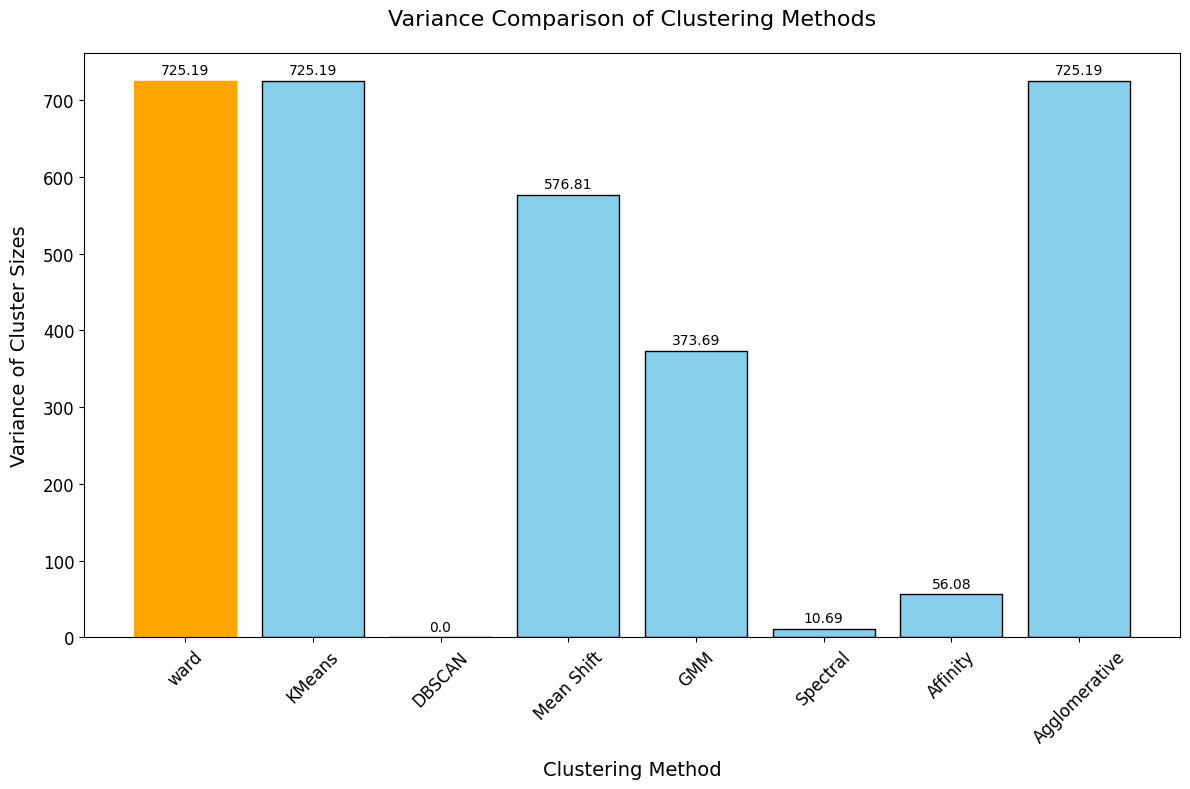

In [51]:
import numpy as np

# 클러스터 크기 데이터
cluster_sizes = [
    cluster_counts1, cluster_counts2, cluster_counts3,
    cluster_counts4, cluster_counts5, spectral_counts,
    affinity_counts, agglomerative_counts
]

# 클러스터링 방법 이름
methods = ['ward', 'KMeans', 'DBSCAN', 'Mean Shift', 'GMM', 
           'Spectral', 'Affinity', 'Agglomerative']

# 분산 계산
variances = [np.var(sizes) for sizes in cluster_sizes]

# 분산 시각화
plt.figure(figsize=(12, 8))
bars = plt.bar(methods, variances, color='skyblue', edgecolor='black')

# 하이라이트를 위한 최대 분산 바의 색상 변경
max_variance_index = np.argmax(variances)
bars[max_variance_index].set_color('orange')

# 각 바에 값 라벨 추가
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, round(yval, 2), ha='center', va='bottom')

# 스타일링
plt.xlabel('Clustering Method', fontsize=14, labelpad=10)
plt.ylabel('Variance of Cluster Sizes', fontsize=14, labelpad=10)
plt.title('Variance Comparison of Clustering Methods', fontsize=16, pad=20)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


이 그래프를 보았을때는 DBSCAN아 값이 0인것을 감안하였을때 가장 분산차이가 적은것은 spectral 기법이라고 볼수있다.

In [52]:
# 지정된 열 삭제
cleaned_df = cleaned_df.drop(columns=['Cluster_Labels', 'Affinity_Cluster', 'DBSCAN_Cluster', 'Agglomerative_Cluster'])

# 결과 확인
print(cleaned_df)


   Ticker        RSI        volume   Beta  DividendYield        PER  \
0    AAPL  60.891036  6.888900e+07  1.264           0.55  28.970451   
1    MSFT  61.321318  6.343245e+06  0.893           0.72  35.882050   
2    AMZN  61.228543  5.172203e+06  1.155           0.00  52.407307   
4   GOOGL  53.160397  3.051076e+06  1.019           0.47  25.901989   
5    GOOG  53.086364  3.502121e+06  1.019           0.47  26.211655   
..    ...        ...           ...    ...            ...        ...   
93    CME  51.810189  6.287800e+06  0.488           4.15  23.908884   
94     CL  64.148240  2.044373e+07  0.394           2.10  29.987300   
95    PLD  63.595179  1.963317e+07  1.058           3.57  31.485380   
96   LRCX  62.697293  1.699392e+07  1.511           0.87  33.239790   
97     SO  59.866619  2.172282e+06  0.476           3.69  20.388601   

    Volatility  Spectral_Cluster  
0     0.012570                 2  
1     0.015824                 3  
2     0.020805                 1  
4     0

### Spectral 클러스터 후 시각화

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

# Spectral 클러스터링 수행
spectral = SpectralClustering(n_clusters=4, affinity='nearest_neighbors', n_neighbors=10, random_state=42)
labels = spectral.fit_predict(data_for_clustering)

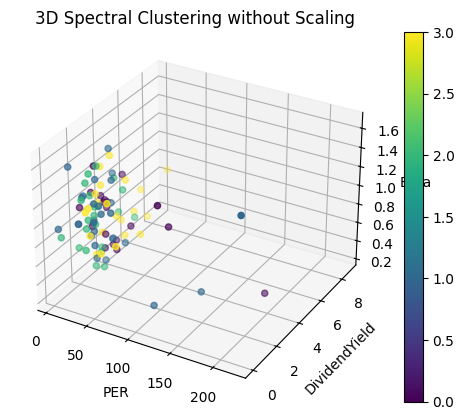

In [54]:
# 3D 플롯으로 클러스터링 결과 시각화
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(data_for_clustering['PER'], data_for_clustering['DividendYield'], data_for_clustering['Beta'], c=labels, cmap='viridis')

# 레이블 및 타이틀
ax.set_title('3D Spectral Clustering without Scaling')
ax.set_xlabel('PER')
ax.set_ylabel('DividendYield')
ax.set_zlabel('Beta')
plt.colorbar(scatter)
plt.show()

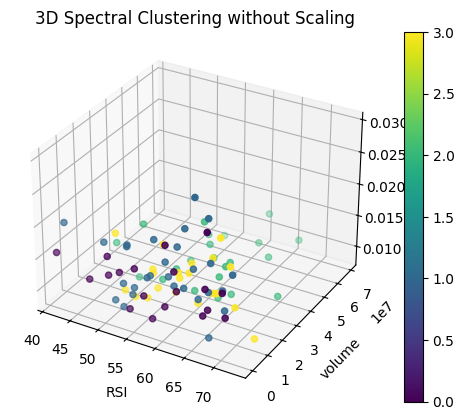

In [55]:
# 3D 플롯으로 클러스터링 결과 시각화
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(data_for_clustering['RSI'], data_for_clustering['volume'], data_for_clustering['Volatility'], c=labels, cmap='viridis')

# 레이블 및 타이틀
ax.set_title('3D Spectral Clustering without Scaling')
ax.set_xlabel('RSI')
ax.set_ylabel('volume')
ax.set_zlabel('Volatility')
plt.colorbar(scatter)
plt.show()

### 각 클러스터의 변수 경계값 

In [56]:
# 클러스터링 결과를 데이터프레임에 추가
data_for_clustering['Cluster'] = labels

# 클러스터 중심 및 경계 계산
# 각 클러스터에 대한 각 변수의 중앙값을 계산
centroids = data_for_clustering.groupby('Cluster').median()

# 각 클러스터에 대한 각 변수의 최소 및 최대값을 계산하여 경계를 정의
boundaries = data_for_clustering.groupby('Cluster').agg(['min', 'max'])

print("Centroids:")
print(centroids)
print("\nBoundaries:")
print(boundaries)

Centroids:
               PER  DividendYield   Beta        RSI        volume  Volatility
Cluster                                                                      
0        20.986225          2.790  0.947  59.866619  1.521273e+06    0.015031
1        31.267589          1.235  1.019  60.194904  3.553733e+06    0.016248
2        27.733320          1.500  0.985  62.047574  2.119128e+07    0.012701
3        23.687010          2.630  0.844  62.113283  7.492383e+06    0.014922

Boundaries:
               PER             DividendYield             Beta         \
               min         max           min       max    min    max   
Cluster                                                                
0        10.530504  187.611100          0.85  4.680000  0.235  1.395   
1         5.515263  221.411760          0.00  3.930000  0.371  1.660   
2        11.312888   37.865383          0.00  5.030000  0.394  1.511   
3         9.279570   78.171300          0.00  8.729999  0.405  1.398   

   

In [57]:
cleaned_df.rename(columns={'Spectral_Cluster': 'Cluster'}, inplace=True)

Spectral_Cluster 칼럼 이름을 Cluster 으로 바꾸기

In [66]:
import pandas as pd

# 클러스터 중심과 경계값 데이터 프레임 예시
centroids = pd.DataFrame({
    'PER': [23.32, 28.89, 27.30, 22.95],
    'DividendYield': [2.67, 1.26, 1.49, 2.79],
    'Beta': [0.83, 1.04, 0.98, 0.91],
    'RSI': [62.11, 60.19, 62.05, 58.82],
    'volume': [7492383, 3553733, 21191280, 1572210],
    'Volatility': [0.01492, 0.01625, 0.01270, 0.01477]
}, index=['Cluster0', 'Cluster1', 'Cluster2', 'Cluster3'])

def get_user_input(feature_name):
    """사용자 입력을 받고 유효성을 검사하는 함수."""
    while True:
        value = input(f"Enter {feature_name} (high, medium, low): ").strip().lower()
        if value in ['high', 'medium', 'low']:
            return value
        else:
            print("Invalid input. Please enter 'high', 'medium', or 'low'.")

# 사용자 입력 받기
user_input = {
    'PER': get_user_input('PER'),
    'DividendYield': get_user_input('DividendYield'),
    'Beta': get_user_input('Beta'),
    'RSI': get_user_input('RSI'),
    'volume': get_user_input('volume'),
    'Volatility': get_user_input('Volatility')
}

print("User input received:", user_input)

# 입력을 실제 값 범위로 매핑
def map_input(cluster_feature, feature_value):
    if feature_value == 'high':
        return cluster_feature.max()
    elif feature_value == 'medium':
        return cluster_feature.mean()
    elif feature_value == 'low':
        return cluster_feature.min()

# 각 클러스터에 대해 가장 적합한지 평가
def evaluate_cluster_fit(user_values, centroids):
    distances = []
    for index, row in centroids.iterrows():
        distance = sum((user_values[feature] - row[feature])**2 for feature in user_values.keys())
        distances.append(distance)
    return distances.index(min(distances))

# 사용자 값 범위 매핑
mapped_values = {feature: map_input(centroids[feature], value) for feature, value in user_input.items()}

# 가장 적합한 클러스터 찾기
closest_cluster = evaluate_cluster_fit(mapped_values, centroids)

tickers_in_cluster = cleaned_df[cleaned_df['Cluster'] == closest_cluster]['Ticker'].tolist()
print(f"The most suitable cluster for the given input is: Cluster {closest_cluster}")
print("Tickers in the selected cluster:", tickers_in_cluster)


User input received: {'PER': 'high', 'DividendYield': 'low', 'Beta': 'medium', 'RSI': 'low', 'volume': 'high', 'Volatility': 'low'}
The most suitable cluster for the given input is: Cluster 2
Tickers in the selected cluster: ['AAPL', 'BRK-B', 'V', 'MA', 'WMT', 'CVX', 'ORCL', 'NKE', 'IBM', 'TMO', 'HON', 'LIN', 'LOW', 'LMT', 'GS', 'BKNG', 'MDLZ', 'D', 'CB', 'CL', 'PLD', 'LRCX']


### 포트폴리오 최적화:  효율적 투자선(샤프비율 최대화)

stock_data 는 본인이 저장한 파일경로를 지정

In [59]:
stock_data = pd.read_csv('C:/Users/82106/Desktop/경영 캡스톤 프로젝트2/stock_data.csv')

In [60]:
# stock_data에서 지정된 티커들만 선택
selected_data = stock_data[tickers_in_cluster]

In [61]:
# 일간 수익률 계산
returns = selected_data.pct_change().dropna()

# 연간 수익률 계산
mean_returns = returns.mean() * 252

# 공분산 행렬 계산
cov_matrix = returns.cov() * 252

# 출력으로 확인
print("Mean Returns:\n", mean_returns)
print("Covariance Matrix:\n", cov_matrix)


Mean Returns:
 MSFT    0.431093
T      -0.159534
VZ      0.023952
ABBV    0.277796
PM      0.097061
ACN     0.306833
NFLX    0.572996
MCD     0.157411
MDT     0.118320
BLK     0.473083
UNP     0.233012
UPS     0.471543
COST    0.328159
CVS     0.019349
TGT     0.413259
ISRG    0.416611
NOW     0.758476
MS      0.459942
ADBE    0.513760
CI      0.138890
MO     -0.034768
CME     0.021082
dtype: float64
Covariance Matrix:
           MSFT         T        VZ      ABBV        PM       ACN      NFLX  \
MSFT  0.193836  0.093382  0.066320  0.095103  0.106854  0.138745  0.121900   
T     0.093382  0.127864  0.069311  0.075188  0.102279  0.104048  0.039761   
VZ    0.066320  0.069311  0.060615  0.050535  0.064897  0.067456  0.037540   
ABBV  0.095103  0.075188  0.050535  0.122236  0.084689  0.091024  0.047245   
PM    0.106854  0.102279  0.064897  0.084689  0.153913  0.104027  0.061338   
ACN   0.138745  0.104048  0.067456  0.091024  0.104027  0.175200  0.074414   
NFLX  0.121900  0.039761  0.03

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# 샤프 비율 최대화 함수
def negative_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate=0.01):
    portfolio_return = np.dot(weights, mean_returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility
    return -sharpe_ratio  # 최대화를 위해 샤프 비율의 음수값 반환

# 변동성 및 수익률 계산 함수
def get_ret_vol_sr(weights):
    portfolio_return = np.dot(weights, mean_returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe_ratio = (portfolio_return - 0.01) / portfolio_volatility
    return np.array([portfolio_return, portfolio_volatility, sharpe_ratio])

In [63]:
# 몬테카를로 시뮬레이션을 이용한 효율적 투자선 계산
num_portfolios = 10000
all_weights = np.zeros((num_portfolios, len(mean_returns)))
ret_arr = np.zeros(num_portfolios)
vol_arr = np.zeros(num_portfolios)
sharpe_arr = np.zeros(num_portfolios)

for ind in range(num_portfolios):
    weights = np.random.random(len(mean_returns))
    weights /= np.sum(weights)
    all_weights[ind, :] = weights
    ret_vol_sr = get_ret_vol_sr(weights)
    ret_arr[ind] = ret_vol_sr[0]
    vol_arr[ind] = ret_vol_sr[1]
    sharpe_arr[ind] = ret_vol_sr[2]

# 최대 샤프 비율 포트폴리오 찾기
max_sharpe_idx = sharpe_arr.argmax()
max_sharpe_return = ret_arr[max_sharpe_idx]
max_sharpe_volatility = vol_arr[max_sharpe_idx]


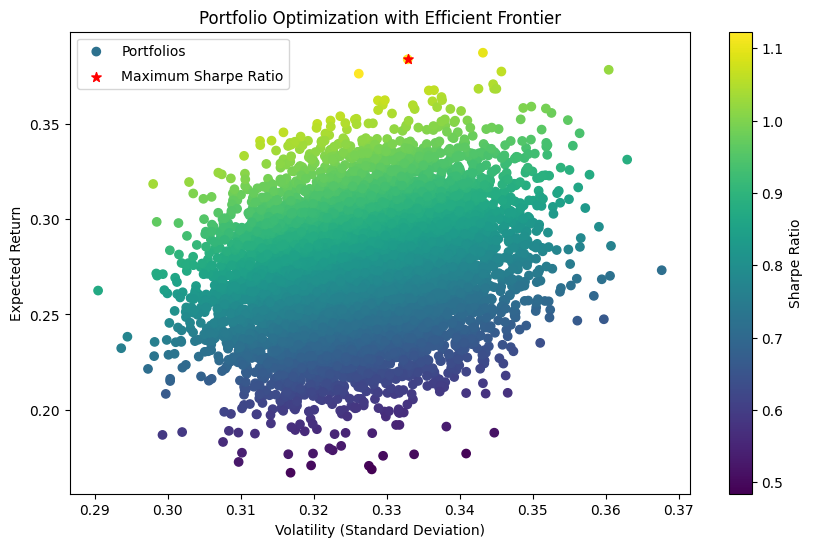

In [64]:
# 효율적 투자선 시각화
plt.figure(figsize=(10, 6))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis', label='Portfolios')
plt.colorbar(label='Sharpe Ratio')
plt.scatter(max_sharpe_volatility, max_sharpe_return, color='red', s=50, marker='*', label='Maximum Sharpe Ratio')
plt.title('Portfolio Optimization with Efficient Frontier')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Expected Return')
plt.legend(labelspacing=0.8)
plt.show()

In [65]:
# 전체 투자 자본 설정
total_capital = 100000  # 예: 100,000 USD

# 최적 포트폴리오의 가중치
optimal_weights = all_weights[max_sharpe_idx]

# 투자할 각 티커에 대한 금액 계산
investment_per_ticker = total_capital * optimal_weights

# 결과 출력
print("Investment per Ticker:")
for ticker, capital in zip(tickers_in_cluster, investment_per_ticker):
    print(f"{ticker}: ${capital:.2f}")

# 추가 정보 출력
print("\nTotal Investment: $", total_capital)
print("Expected Return of the Portfolio: ", max_sharpe_return)
print("Expected Volatility of the Portfolio: ", max_sharpe_volatility)


Investment per Ticker:
MSFT: $7089.10
T: $4965.19
VZ: $78.68
ABBV: $7302.00
PM: $869.09
ACN: $5333.45
NFLX: $10436.71
MCD: $92.95
MDT: $6506.99
BLK: $7015.51
UNP: $2411.70
UPS: $7833.64
COST: $5011.17
CVS: $1542.57
TGT: $3500.86
ISRG: $10386.97
NOW: $9532.38
MS: $1605.08
ADBE: $4201.94
CI: $3141.53
MO: $251.06
CME: $891.44

Total Investment: $ 100000
Expected Return of the Portfolio:  0.3837653397748137
Expected Volatility of the Portfolio:  0.33286017907837745


포트폴리오 구성후 예상 연간수익률은 24퍼센트